In [38]:
import os, json, requests, math, cv2
from PIL import Image
from skimage import io
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

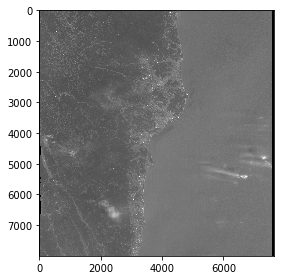

In [39]:
img_BLUE = cv2.imread('IMG-01-ALAV2A278172850-OORIRFU_002.tif')
io.imshow(img_BLUE)

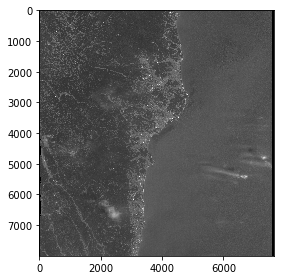

In [40]:
img_GLEEN = cv2.imread('IMG-02-ALAV2A278172850-OORIRFU_002.tif')
io.imshow(img_GLEEN)

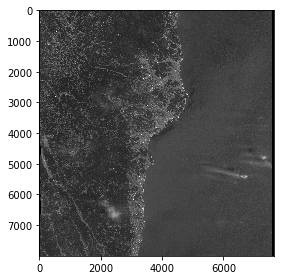

In [41]:
img_RED = cv2.imread('IMG-03-ALAV2A278172850-OORIRFU_002.tif')
io.imshow(img_RED)

In [42]:
# 色変換
TYPE_BLUE = 1
TYPE_GLEEN = 2
TYPE_RED = 3

def img_change_color(img,colortype):
    
    temp_img = cv2.split(img)
    
    # ゼロ埋めの画像配列
    if len(img.shape) == 3:
        height, width, channels = img.shape[:3]
    else:
        height, width = img.shape[:2]
        channels = 1
    zeros = np.zeros((height, width), img.dtype)
    #TYPE_BLUEだったら青だけ、TYPE_GLEENならば緑だけそれ以外（TYPE_RED）だったら赤だけ残し、他をゼロで埋める
    if colortype == TYPE_RED:
        return cv2.merge((temp_img[1],zeros,zeros))
    elif colortype == TYPE_GLEEN:
        return cv2.merge((zeros,temp_img[1],zeros))
    else:
        return cv2.merge((zeros,zeros,temp_img[1]))

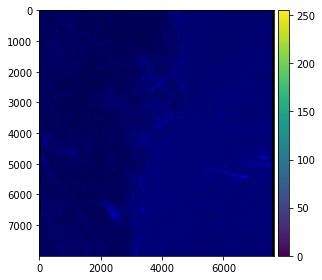

In [43]:
img_blue = img_change_color(img_BLUE,TYPE_BLUE)
io.imshow(img_blue)

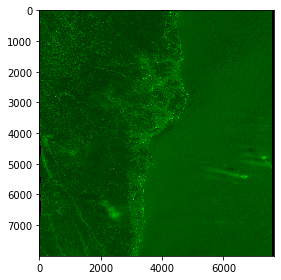

In [44]:
img_gleen = img_change_color(img_GLEEN,TYPE_GLEEN)
io.imshow(img_gleen)

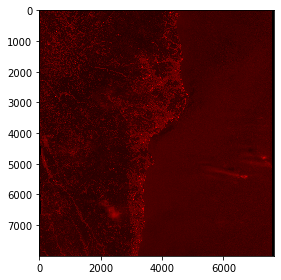

In [45]:
img_red = img_change_color(img_RED,TYPE_RED)
io.imshow(img_red)

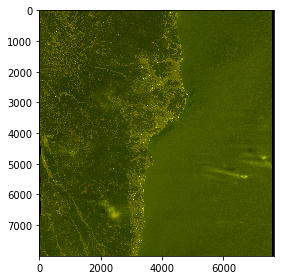

In [46]:
rg = cv2.addWeighted(img_red,1,img_gleen,1,0)
io.imshow(rg)

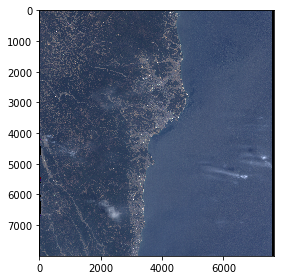

In [47]:
rgb_1 = cv2.addWeighted(rg,1,img_blue,1,0)
io.imshow(rgb_1)